In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import statistics

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Copper_Set.csv")

<ipython-input-5-4de8b9168e53>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Copper_Set.csv")


## **EDA & Pre-processing**


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
df.rename(columns={'item type': 'item_type', 'quantity tons': 'quantity_tons'}, inplace=True)

In [8]:
df.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [9]:
df.isnull().sum()

,0
id,2
item_date,1
quantity_tons,0
customer,1
country,28
status,2
item_type,0
application,24
thickness,1
width,0


In [10]:
df['country'].value_counts()

,count
country,
78.0,32084
26.0,27516
25.0,23362
27.0,21511
32.0,18658
28.0,15824
84.0,12776
77.0,9714
30.0,8702


In [11]:
df['country'] = df['country'].fillna(df['country'].median())
df['application'] = df['application'].fillna(df['application'].median())
df['thickness'] = df['thickness'].fillna(df['thickness'].median())
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].median())

In [12]:
df.isnull().sum()

,0
id,2
item_date,1
quantity_tons,0
customer,1
country,0
status,2
item_type,0
application,0
thickness,0
width,0


In [13]:
df['material_ref'].value_counts().sum()

103754

Cleaning material_ref

In [14]:
df.sort_values('material_ref')

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
56358,52ECEF28-42E4-4FE5-9F25-1334CD966405,20210121.0,21.879115,30284855.0,40.0,Lost,S,20.0,5.00,1250.0,-,640405,20210501.0,916.0
56205,B6C16E70-7EA9-4695-9849-7467A7F9134F,20210121.0,18.260646,30225641.0,40.0,Revised,S,10.0,6.00,1500.0,-,640405,20210501.0,849.0
3705,DEB85516-A62E-4A20-88AD-56171F161194,20210326.0,98.207771,30206401.0,27.0,Won,S,59.0,2.37,1125.0,-,1670798778,20210701.0,1123.0
45163,4D3E2AFF-C7BA-4B87-A5EA-26FD2934A1EA,20210203.0,38.979512,30225641.0,40.0,Won,S,10.0,5.00,2000.0,-,640405,20210501.0,817.0
45191,08B7DB8D-20CE-47D8-AB0C-9E6BBFF2379A,20210203.0,23.875215,30225641.0,40.0,Revised,S,10.0,6.00,1500.0,-,640405,20210501.0,847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181652,F5EC467C-300D-4E85-BEF7-51999E0B7CA7,20200702.0,1.672378945,30155929.0,25.0,Won,W,41.0,0.58,1220.0,NaN,611993,20200701.0,776.0
181653,497F5391-F450-4B49-870D-9B62A0274DD6,20200702.0,50.6469069,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,763.0
181654,04701946-E052-44C9-BCB5-C6AFC2EBFF7E,20200702.0,3.769829492,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,773.0
181655,D9E161D4-ACE6-47B5-ADB0-71FB3E95BF9A,20200702.0,220.8752724,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,766.0


In [15]:
df['material_ref'] = df['material_ref'].replace('None', np.nan)

In [16]:
df.replace("-", np.nan, inplace=True)
df.replace(".", np.nan, inplace=True)
df.replace('', np.nan, inplace=True)
df.replace('  ', np.nan, inplace=True)


In [17]:
103754*.75

77815.5

In [18]:
material_ref_col = df['material_ref'].value_counts()
material_ref_col_df = pd.DataFrame(material_ref_col)
material_ref_reset = material_ref_col_df.reset_index()


In [20]:
material_ref_reset

,material_ref,count
0,DX51D+Z,922
1,G9010,856
2,DC01 RED.FLAT KUCHNIA EKO 2.2,777
3,DC01,725
4,G9006,671
...,...,...
16556,0000000000000000000000000000000003050080,1
16557,0000000000000000000000000000000004001568,1
16558,0000000000000000000000000000000003016460,1
16559,0000000000000000000000000000000003016459,1


In [21]:
material_ref_reset.columns = ['material_ref','counts']

In [22]:
type(material_ref_reset)

pandas.core.frame.DataFrame

In [23]:
material_ref_reset.head(5500).sum() #79575

,0
material_ref,DX51D+ZG9010DC01 RED.FLAT KUCHNIA EKO 2.2DC01G...
counts,79575


In [24]:
material_ref_reset.head(5500) #mat_ref less than 5 counts not considered for spread!

,material_ref,counts
0,DX51D+Z,922
1,G9010,856
2,DC01 RED.FLAT KUCHNIA EKO 2.2,777
3,DC01,725
4,G9006,671
...,...,...
5495,KJMZN-075R-S220GD-100MBC3-1250,5
5496,35370633AHCUS3ATL,5
5497,F00000000861,5
5498,0.63X1247 N N7954 GOOSEWING,5


In [25]:
material_ref_reset.head(5500).sum() #2-sig

,0
material_ref,DX51D+ZG9010DC01 RED.FLAT KUCHNIA EKO 2.2DC01G...
counts,79575


In [26]:
material_ref_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16561 entries, 0 to 16560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   material_ref  16561 non-null  object
 1   counts        16561 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 258.9+ KB


In [27]:
material_ref_type = material_ref_reset['material_ref'].unique()

In [28]:
material_ref_type

array(['DX51D+Z', 'G9010', 'DC01 RED.FLAT KUCHNIA EKO 2.2', ...,
       '0000000000000000000000000000000003016460',
       '0000000000000000000000000000000003016459', '202006170005.IO.1.1'],
      dtype=object)

In [29]:
material_ref_type
material_ref_type_list = []
for i in material_ref_type:
  material_ref_type_list.append(i)

In [30]:
material_ref_toplist = material_ref_type_list[:5500] #top 5500

In [31]:
material_ref_toplist

['DX51D+Z',
 'G9010',
 'DC01 RED.FLAT KUCHNIA EKO 2.2',
 'DC01',
 'G9006',
 'G9002',
 'G7016',
 'S235JR+AR-CL1',
 'K DX51D+Z PROFILES',
 'NEQ1 S355J2+N',
 'DX51D+Z275 EKO 2.2',
 'A9010',
 'CLS05S700MC/000094',
 'S220GD+Z',
 'S235JR+N-CL1',
 'DES1 DD11-CL1AMFCE',
 'S355MC-CAT_A 3.1',
 'typical item',
 'DX51D+Z275',
 'DC01-CAT_A',
 'S355J2+N-CL1',
 'DX51D+Z_A',
 'S235JR+AR_CL1',
 'S350GD+ZM',
 'S220GD+Z275 MAC_GALV EDGES',
 'PI_S235JR-CL1',
 'CONSIGNMENT STOCK',
 'G7035',
 'DC04',
 'BOB',
 'DC01+ZV25/25',
 'S235JR+AR LARG SUP 1500 CVLT',
 '81420726363F35CSA',
 'DC01+ZE',
 'DX51D+ZM',
 'HC220CA',
 'typical basket',
 'NANS3JRGS',
 'DC04 EKO 3.1',
 'DEQ1 P295GH',
 'NES1 S235JR',
 'ACCESS STD SPAIN',
 '0000000000000000000000000000000020000069',
 'DD11-CL1',
 '002-06-2017/US/Serwistal',
 'G9007',
 'DD11-CAT_A',
 '2_S235JR+AR-CL1',
 'S275JR+AR-CL1',
 '405029489B2F60HEA',
 'G3000',
 'DX51D+Z A',
 'DX51D+Z100 EKO 2.2',
 'BL_S355J2+N-CL1',
 'DD11 EKO',
 'S355MC',
 'DES1 S235JR',
 'DC01 EKO 2.2',


In [32]:
df.sort_values('material_ref')

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
9728,C0DF7754-1959-4178-B1F4-F9A031CA5BEA,20210319.0,33.344994,30264704.0,32.0,Won,S,29.0,0.35,1050.0,"0,35X1050",164141591,20210701.0,1266.0
87113,07DDB4D9-2A50-4955-A024-8845CBD55B38,20201202.0,23.434117,30264704.0,32.0,Won,S,29.0,0.35,1050.0,"0,35X1050",164141591,20210401.0,1058.0
87117,6C1666E5-F6C1-43AA-9317-B8EA96B46CB0,20201202.0,40.973349,30264704.0,32.0,Won,S,29.0,0.37,1260.0,"0,37X1260",164141591,20210401.0,1054.0
67187,5424C5D8-C5E3-461E-9782-1D91CA9326BF,20210108.0,38.257129,30264704.0,32.0,Won,S,29.0,0.37,1260.0,"0,37X1260",164141591,20210401.0,1051.0
9730,C0E2E5A0-32A4-4445-94BB-9D55E5A44C41,20210319.0,39.163641,30264704.0,32.0,Won,S,29.0,0.37,1260.0,"0,37X1260",164141591,20210701.0,1263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181652,F5EC467C-300D-4E85-BEF7-51999E0B7CA7,20200702.0,1.672378945,30155929.0,25.0,Won,W,41.0,0.58,1220.0,NaN,611993,20200701.0,776.0
181653,497F5391-F450-4B49-870D-9B62A0274DD6,20200702.0,50.6469069,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,763.0
181654,04701946-E052-44C9-BCB5-C6AFC2EBFF7E,20200702.0,3.769829492,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,773.0
181655,D9E161D4-ACE6-47B5-ADB0-71FB3E95BF9A,20200702.0,220.8752724,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,20200701.0,766.0


In [33]:
df["material_ref"].isnull().sum()

77953

In [34]:
df['material_ref_bias'] = df['material_ref'].isnull().apply(lambda x : not(x))
df['material_ref_bias'] = df['material_ref_bias'].astype(int)

In [35]:
df["material_ref_bias"].describe()

,material_ref_bias
count,181673.000000
mean,0.570916
std,0.494947
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [36]:
df = df.fillna(value=np.nan)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181671 non-null  object 
 1   item_date          181672 non-null  float64
 2   quantity_tons      181673 non-null  object 
 3   customer           181672 non-null  float64
 4   country            181673 non-null  float64
 5   status             181671 non-null  object 
 6   item_type          181673 non-null  object 
 7   application        181673 non-null  float64
 8   thickness          181673 non-null  float64
 9   width              181673 non-null  float64
 10  material_ref       103720 non-null  object 
 11  product_ref        181673 non-null  int64  
 12  delivery date      181672 non-null  float64
 13  selling_price      181673 non-null  float64
 14  material_ref_bias  181673 non-null  int64  
dtypes: float64(8), int64(2), object(5)
memory usage: 20

In [38]:
df.isnull().sum()

,0
id,2
item_date,1
quantity_tons,0
customer,1
country,0
status,2
item_type,0
application,0
thickness,0
width,0


In [39]:
df['status'].value_counts()

,count
status,
Won,116010
Lost,34438
Not lost for AM,19573
Revised,4276
To be approved,4170
Draft,3140
Offered,53
Offerable,10
Wonderful,1


In [40]:
values = ['Lost']

#drop rows that contain any value in the list
df = df[df.status.isin(values) == False]

In [41]:
'''
from datetime import date

def dayscal(deliver_date, item_date):
  """
  Calculates the difference in days between two dates.
  Handles missing values and potential formatting issues.

  Args:
    deliver_date: Delivery date (expected to be a number or a string).
    item_date: Item date (expected to be a number or a string).

  Returns:
    The difference in days between the two dates, or NaN if either date is invalid.
  """
  try:
    # Convert to strings and remove decimal part if present
    a1 = str(deliver_date).split(".")[0]
    b1 = str(item_date).split(".")[0]

    # Extract year, month, and day, handling potential empty strings
    d_year = int(a1[:4]) if a1[:4].strip() else None
    d_month = int(a1[4:6]) if a1[4:6].strip() else None
    d_date = int(a1[-2:]) if a1[-2:].strip() else None

    i_year = int(b1[:4]) if b1[:4].strip() else None
    i_month = int(b1[4:6]) if b1[4:6].strip() else None
    i_date = int(b1[-2:]) if b1[-2:].strip() else None

    # Check if all components are valid before creating date objects
    if all([d_year, d_month, d_date, i_year, i_month, i_date]):
      a = date(d_year, d_month, d_date)
      b = date(i_year, i_month, i_date)
      return (a - b).days
    else:
      return float('nan')  # Return NaN if any component is invalid

  except (ValueError, TypeError):
    return float('nan')  # Return NaN for any other error

# Apply the function to the DataFrame
df['delivery_days'] = df.apply(lambda row: dayscal(row['delivery date'], row['item_date']), axis=1)
'''

'\nfrom datetime import date\n\ndef dayscal(deliver_date, item_date):\n  """\n  Calculates the difference in days between two dates.\n  Handles missing values and potential formatting issues.\n\n  Args:\n    deliver_date: Delivery date (expected to be a number or a string).\n    item_date: Item date (expected to be a number or a string).\n\n  Returns:\n    The difference in days between the two dates, or NaN if either date is invalid.\n  """\n  try:\n    # Convert to strings and remove decimal part if present\n    a1 = str(deliver_date).split(".")[0]\n    b1 = str(item_date).split(".")[0]\n\n    # Extract year, month, and day, handling potential empty strings\n    d_year = int(a1[:4]) if a1[:4].strip() else None\n    d_month = int(a1[4:6]) if a1[4:6].strip() else None\n    d_date = int(a1[-2:]) if a1[-2:].strip() else None\n\n    i_year = int(b1[:4]) if b1[:4].strip() else None\n    i_month = int(b1[4:6]) if b1[4:6].strip() else None\n    i_date = int(b1[-2:]) if b1[-2:].strip() else N

In [42]:
result = df.groupby(['status', 'item_type']).size().reset_index(name='count')
print(result)

             status item_type  count
0             Draft    Others     43
1             Draft        PL    142
2             Draft         S   1059
3             Draft         W   1892
4             Draft        WI      4
5   Not lost for AM    Others     33
6   Not lost for AM        PL    409
7   Not lost for AM         S  11794
8   Not lost for AM         W   7333
9   Not lost for AM        WI      4
10        Offerable         S      2
11        Offerable         W      8
12          Offered         S     33
13          Offered         W     20
14          Revised    Others     71
15          Revised        PL     72
16          Revised         S   2291
17          Revised         W   1830
18          Revised        WI     12
19   To be approved        PL      5
20   To be approved         S   1589
21   To be approved         W   2576
22              Won       IPL     27
23              Won    Others    437
24              Won        PL   4980
25              Won         S  30918
2

In [43]:
df['item_date'].value_counts()

,count
item_date,
20210304.0,2015
20201202.0,1962
20210323.0,1696
20210318.0,1648
20200929.0,1609
...,...
20201128.0,1
20201219.0,1
20200906.0,1


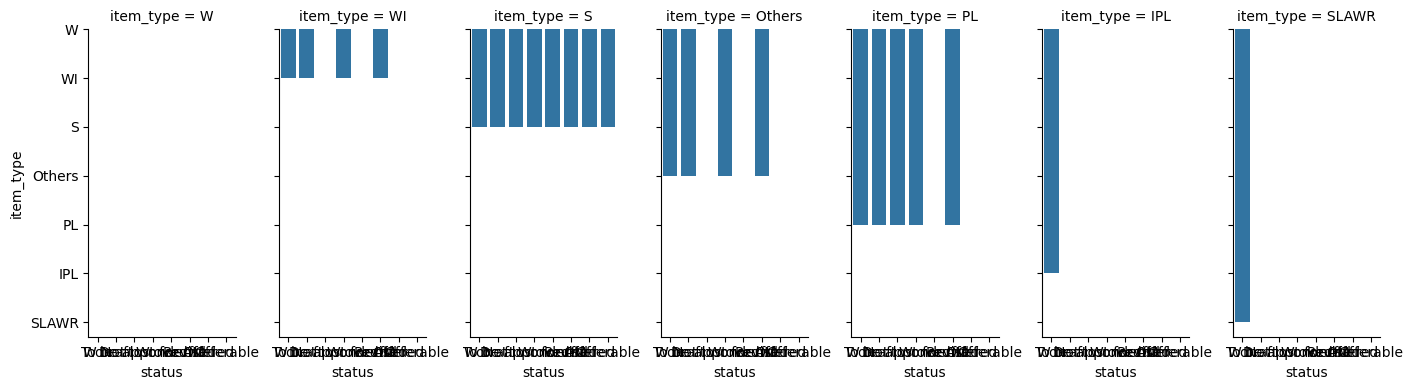

In [44]:
sns.catplot(
    df, kind="bar",
    x="status", y="item_type", col="item_type",
    height=4, aspect=.5,
)

In [45]:
df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,material_ref_bias
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,1
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,1
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,1
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00,1
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00,1
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00,1
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00,1


In [46]:
df['material_ref'] = df['material_ref'].replace('None', np.nan)

In [47]:
i = 0
j = 0
def filltrim2(x):
  if pd.isna(x) or x == "None":
    global i, j
    val = material_ref_toplist[i]
    if i >= len(material_ref_toplist)-1:
      j +=  i
      i=0
    else:
      i += 1
      return val
  else:
    return x


df['material_ref'] = df['material_ref'].apply(filltrim2)
print(j, "values filled in material_ref column")

54990 values filled in material_ref column


In [48]:
df.replace('', np.nan, inplace=True)
i = 0
j = 0
def filltrim2(x):
  if pd.isna(x) or x == "None":
    global i, j
    val = material_ref_toplist[i]
    if i >= len(material_ref_toplist)-1:
      j +=  i
      i=0
    else:
      i += 1
      return val
  else:
    return x


df['material_ref'] = df['material_ref'].apply(filltrim2)
print(j, "values filled in material_ref column")

0 values filled in material_ref column


In [49]:
df.query('material_ref.isnull()')

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,material_ref_bias


In [50]:
df = df.dropna()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147229 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 147229 non-null  object 
 1   item_date          147229 non-null  float64
 2   quantity_tons      147229 non-null  object 
 3   customer           147229 non-null  float64
 4   country            147229 non-null  float64
 5   status             147229 non-null  object 
 6   item_type          147229 non-null  object 
 7   application        147229 non-null  float64
 8   thickness          147229 non-null  float64
 9   width              147229 non-null  float64
 10  material_ref       147229 non-null  object 
 11  product_ref        147229 non-null  int64  
 12  delivery date      147229 non-null  float64
 13  selling_price      147229 non-null  float64
 14  material_ref_bias  147229 non-null  int64  
dtypes: float64(8), int64(2), object(5)
memory usage: 18.0+ M

In [52]:
df.isnull().sum()

,0
id,0
item_date,0
quantity_tons,0
customer,0
country,0
status,0
item_type,0
application,0
thickness,0
width,0


In [53]:
#sns.boxplot(x='item_type',y='material_ref', data=df)
#plt.show()

In [54]:
df['id'].value_counts() #label encoding


,count
id,
EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1
BA4DB97D-0DB6-4664-B358-039B282567B6,1
5F30EEC3-894A-4882-A42A-087AB5527C33,1
F869EE7D-9069-4623-A5D3-81078CFFB263,1
93F7F6DE-1C9E-47ED-AF47-B1E0C166E34A,1
...,...
37447E3B-2FA0-4A76-9C36-9B0F68D5B098,1
3E2814C5-8758-4010-9E09-DA08B166CAB0,1
16F2E297-9BBE-42A0-A4A3-881C8E66BF98,1


In [55]:
df['product_ref'].value_counts() #label encoding


,count
product_ref,
611993,40473
164141591,24159
640665,22218
628377,15757
1670798778,15497
1668701718,11554
640405,5422
1332077137,3820
1671863738,2415


In [56]:
df['thickness'].value_counts() #ordinal encoding

,count
thickness,
0.50,10916
2.00,10775
3.00,10169
1.50,9525
1.00,7823
...,...
1.59,1
2.28,1
1.49,1


In [57]:
df['material_ref'].value_counts()#label encoding

,count
material_ref,
DX51D+Z,887
G9010,842
DC01 RED.FLAT KUCHNIA EKO 2.2,789
G9006,664
DC01,601
...,...
00.890E.7000.21,1
S220GD 1.5X1250,1
S350GD + ZM70 MAC,1


In [58]:
df['application'].value_counts() #label encoding

,count
application,
10.0,61018
41.0,42244
15.0,11654
59.0,8101
42.0,4801
56.0,4450
27.0,1638
26.0,1535
29.0,1510


In [59]:
df['status'].value_counts() #label encoding

,count
status,
Won,116007
Not lost for AM,19573
Revised,4276
To be approved,4169
Draft,3140
Offered,53
Offerable,10
Wonderful,1


In [60]:
df['quantity_tons'].value_counts()

,count
quantity_tons,
54.151139,1
194.56972,1
195.112471,1
63.697082,1
1.234034,1
...,...
29.154976,1
3.622095,1
402.058904,1


In [61]:
df['country'].value_counts()

,count
country,
78.0,28903
25.0,20736
26.0,17623
27.0,17227
32.0,15490
28.0,12725
84.0,10141
30.0,7975
77.0,7826


In [62]:
df['customer'].value_counts()

,count
customer,
30157111.0,4916
30161088.0,3728
30201846.0,3064
30202938.0,2567
30153510.0,2510
...,...
30198838.0,1
30147616.0,1
30356502.0,1


In [63]:
random_state = np.random.RandomState(42) #model ID
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(df[['width']])

print(model.get_params())

score = pd.DataFrame()
score['scores'] = model.decision_function(df[['width']])

score['anomaly_score'] = model.predict(df[['width']])

score[score['anomaly_score']==-1].head()

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x78AEDE7C2540, 'verbose': 0, 'warm_start': False}


,scores,anomaly_score
2,-0.063054,-1
4,-0.100124,-1
15,-0.004732,-1
17,-0.050274,-1
25,-0.010173,-1


In [64]:
df = df.drop(df[df["quantity_tons"] == 'e'].index)
df['selling_price'] = df['selling_price'].apply(lambda x : float(x))
df['quantity_tons'] = df['quantity_tons'].apply(lambda x : float(x))


In [65]:
df['quantity_tons'].value_counts()

,count
quantity_tons,
54.151139,1
196.170994,1
8.517663,1
195.112471,1
63.697082,1
...,...
3.622095,1
402.058904,1
5.158084,1


In [66]:
df['material_ref'] = df['material_ref'].apply(lambda x : str(x))
df['material_ref'] = df['material_ref'].apply(lambda x : x.lstrip("0"))


In [67]:
df['material_ref'].value_counts()

,count
material_ref,
DX51D+Z,887
G9010,842
DC01 RED.FLAT KUCHNIA EKO 2.2,789
G9006,664
DC01,601
...,...
.890E.7000.21,1
S220GD 1.5X1250,1
S350GD + ZM70 MAC,1


In [68]:

df.replace('', np.nan, inplace=True)
i = 0
j = 0
def filltrim2(x):
  if pd.isna(x) or x == "None":
    global i, j
    val = material_ref_toplist[i]
    if i >= len(material_ref_toplist)-1:
      j +=  i
      i=0
    else:
      i += 1
      return val
  else:
    return x


df['material_ref'] = df['material_ref'].apply(filltrim2)
print(j, "values filled in material_ref column")
print(df.isnull().sum())

0 values filled in material_ref column
id                   0
item_date            0
quantity_tons        0
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
material_ref_bias    0
dtype: int64


In [69]:
if df['material_ref'].isin(['']).any().any():
    print(" '' exists in the DataFrame")
else:
    print(" '' does not exist in the DataFrame")

 '' does not exist in the DataFrame


In [70]:
df.isnull().sum()

,0
id,0
item_date,0
quantity_tons,0
customer,0
country,0
status,0
item_type,0
application,0
thickness,0
width,0


In [71]:
df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,material_ref_bias
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,1
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,1
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,1
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00,1
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00,1
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00,1
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00,1


### **Encoding**

In [72]:
#le = LabelEncoder()
#le.fit(df['status'])
#df['status'] = le.transform(df['status'])

In [74]:
le_col = ['product_ref' , 'country', 'application', 'customer', 'item_type', 'material_ref', 'status']
oe_col = ['width', 'thickness']
label_encoders = {}
le_col_val = {}

for col in le_col:
  le = LabelEncoder()
  le.fit(df[col])

  le_col_val[col] = dict(zip(le.classes_, le.transform(le.classes_)))

  label_encoders[col] = le#save the model

  df[col] = le.transform(df[col])
  print(label_encoders[col].classes_)
  #print(le_col_val)


[    611728     611733     611993     628112     628117     628377
     640400     640405     640665  164141591  164336407  164337175
  929423819 1282007633 1332077137 1665572032 1665572374 1665584662
 1668701376 1668701698 1668701718 1668701725 1670798778 1671863738
 1671876026 1690738206 1690738219 1693867550 1693867563 1721130331
 1722207579]
[ 25.  26.  27.  28.  30.  32.  38.  39.  40.  77.  78.  79.  80.  84.
  89. 107. 113.]
[ 2.  3.  4.  5. 10. 15. 19. 20. 22. 25. 26. 27. 28. 29. 38. 39. 40. 41.
 42. 56. 58. 59. 65. 66. 67. 68. 69. 70. 79. 99.]
[3.01476160e+07 3.01476200e+07 3.01477220e+07 ... 3.04081660e+07
 3.04081850e+07 2.14748365e+09]
['IPL' 'Others' 'PL' 'S' 'SLAWR' 'W' 'WI']
[',35X1050' ',37X1260' ',3X935 DC01 NET GENT' ... 'zapytanie TL'
 'zapytanie ofertowe 013-10-2018-US-Serwi' 'zapytannie TH']
['Draft' 'Not lost for AM' 'Offerable' 'Offered' 'Revised'
 'To be approved' 'Won' 'Wonderful']


In [76]:
ordinal_encoders = {}
mapping = {}
for col in oe_col:

  oe = OrdinalEncoder()

  oe.fit(df[[col]])

  ordinal_encoders[col] = oe #save the model

  df[col] = oe.transform(df[[col]])
  categories = oe.categories_[0]  # Get categories for the first column

  mapping[col] = {value: idx for idx, value in enumerate(categories)}
  print(mapping)

{'width': {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, 15.0: 15, 16.0: 16, 17.0: 17, 18.0: 18, 19.0: 19, 20.0: 20, 21.0: 21, 22.0: 22, 23.0: 23, 24.0: 24, 25.0: 25, 26.0: 26, 27.0: 27, 28.0: 28, 29.0: 29, 30.0: 30, 31.0: 31, 32.0: 32, 33.0: 33, 34.0: 34, 35.0: 35, 36.0: 36, 37.0: 37, 38.0: 38, 39.0: 39, 40.0: 40, 41.0: 41, 42.0: 42, 43.0: 43, 44.0: 44, 45.0: 45, 46.0: 46, 47.0: 47, 48.0: 48, 49.0: 49, 50.0: 50, 51.0: 51, 52.0: 52, 53.0: 53, 54.0: 54, 55.0: 55, 56.0: 56, 57.0: 57, 58.0: 58, 59.0: 59, 60.0: 60, 61.0: 61, 62.0: 62, 63.0: 63, 64.0: 64, 65.0: 65, 66.0: 66, 67.0: 67, 68.0: 68, 69.0: 69, 70.0: 70, 71.0: 71, 72.0: 72, 73.0: 73, 74.0: 74, 75.0: 75, 76.0: 76, 77.0: 77, 78.0: 78, 79.0: 79, 80.0: 80, 81.0: 81, 82.0: 82, 83.0: 83, 84.0: 84, 85.0: 85, 86.0: 86, 87.0: 87, 88.0: 88, 89.0: 89, 90.0: 90, 91.0: 91, 92.0: 92, 93.0: 93, 94.0: 94, 95.0: 95, 96.0: 96, 97.0: 97, 98.0: 98, 99.0: 99, 100.0: 10

In [77]:
cols = ['id','item_date','delivery date' ]
df = df.drop(cols, axis=1)

In [78]:
df

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,selling_price,material_ref_bias
0,54.151139,46,3,6,5,4,188.0,1046.0,9662,22,854.00,1
1,768.024839,266,0,6,5,17,67.0,752.0,1417,20,1047.00,1
2,386.127949,36,4,6,6,12,16.0,493.0,13791,5,644.33,1
3,202.411065,871,5,6,3,21,211.0,861.0,9915,20,768.00,1
4,785.526262,365,3,6,5,4,335.0,1311.0,3972,8,577.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,204,0,6,5,17,86.0,762.0,467,9,591.00,1
181669,208.086469,204,0,6,5,17,84.0,1046.0,300,9,589.00,1
181670,4.235594,204,0,6,5,17,58.0,792.0,689,9,619.00,1
181671,-2000.000000,204,0,6,5,17,73.0,792.0,502,9,601.00,1


### **Data Visualization & Analysis**

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [79]:
df['selling_price']

,selling_price
0,854.00
1,1047.00
2,644.33
3,768.00
4,577.00
...,...
181668,591.00
181669,589.00
181670,619.00
181671,601.00


In [ ]:
df.plot(kind='scatter', x='item_type', y='quantity_tons')
plt.show()

In [ ]:
df.plot(kind='scatter', x='item_type', y='selling_price')
plt.show()

In [ ]:
df['selling_price'].describe()

In [ ]:
df

In [80]:
#df = df.drop(df[df["item_type"] == "Others"].index)
#df = df.drop(df[df["item_type"] == "SLAWR"].index)

df = df.drop(df[df["quantity_tons"] > float(1000)].index)
df = df.drop(df[df["quantity_tons"] < float(1)].index)

df = df.drop(df[df["selling_price"] > float(1200)].index)
df = df.drop(df[df["selling_price"] < float(450)].index)

In [ ]:
df.plot(kind='scatter', x='quantity_tons', y='selling_price')
plt.show()

In [ ]:
sns.lmplot(x ="quantity_tons", y ="selling_price", data = df, order = 2, ci = None)
plt.show()

In [ ]:
df

In [ ]:
sns.boxplot(x='item_type',y='selling_price', data=df)
plt.show()

In [ ]:
df.groupby('item_type').describe()

In [ ]:
'''
df = df.drop(df[(df["item_type"] == 'WI') & (df["selling_price"] < float(450))].index)
df = df.drop(df[(df["item_type"] == 'WI') & (df["selling_price"] > float(890))].index)

df = df.drop(df[(df["item_type"] == 'PL') & (df["selling_price"] > float(1200))].index)

df = df.drop(df[(df["item_type"] == 'IPL') & (df["selling_price"] >= float(915))].index)
df = df.drop(df[(df["item_type"] == 'IPL') & (df["selling_price"] <= float(700))].index)
'''

In [ ]:
df


In [ ]:
sns.violinplot(x='item_type',y='selling_price', data=df)
plt.show()

In [ ]:
sns.boxplot(x='item_type',y='quantity_tons', data=df)
df = df.drop(df[(df["item_type"] == 'WI') & (df["quantity_tons"] < float(450))].index)
df = df.drop(df[(df["item_type"] == 'WI') & (df["quantity_tons"] > float(890))].index)
plt.show()

In [81]:
df = df.drop(df[(df["item_type"] == 'W') & (df["quantity_tons"] > float(190))].index)



df = df.drop(df[(df["item_type"] == 'WI') & (df["quantity_tons"] > float(1300))].index)

df = df.drop(df[(df["item_type"] == 'S') & (df["quantity_tons"] > float(200))].index)

df = df.drop(df[(df["item_type"] == 'PL') & (df["quantity_tons"] > float(700))].index)
#df = df.drop(df[(df["item_type"] == 'IPL') & (df["quantity_tons"] <= float(700))].index)
df = df.drop(df[(df["item_type"] == 'Others') & (df["quantity_tons"] <= float(400))].index)

df = df.drop(df[(df["item_type"] == 'WI') & (df["quantity_tons"] < float(450))].index)
df = df.drop(df[(df["item_type"] == 'WI') & (df["quantity_tons"] > float(890))].index)

In [ ]:
sns.boxplot(x='item_type',y='quantity_tons', data=df)
plt.show()

In [ ]:
sns.violinplot(x='item_type',y='quantity_tons', data=df)
plt.show()

In [ ]:
sns.boxplot(x='item_type',y='quantity_tons', data=df)
plt.show()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
sns.FacetGrid(df, hue="item_type") \
   .map(sns.histplot, "selling_price") \
   .add_legend();
plt.show();

In [ ]:
sns.FacetGrid(df, hue="item_type") \
   .map(sns.histplot, "quantity_tons") \
   .add_legend();
plt.show();

In [ ]:
sns.FacetGrid(df, hue="item_type") \
   .map(sns.histplot, "width") \
   .add_legend();
plt.show();

In [ ]:
sns.barplot(x = 'quantity_tons',
            y = 'selling_price',
            data = df.head(100))

# Show the plot
plt.show()

In [ ]:
sns.FacetGrid(df, hue="item_type") \
   .map(sns.histplot, "thickness") \
   .add_legend();
plt.show();

In [ ]:
sns.FacetGrid(df, hue="item_type") \
   .map(sns.histplot, "country") \
   .add_legend();
plt.show();

In [82]:
df['selling_price'] = df.pop('selling_price') #moving selling_price to last column

In [83]:
df

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,material_ref_bias,selling_price
0,54.151139,46,3,6,5,4,188.0,1046.0,9662,22,1,854.00
1,768.024839,266,0,6,5,17,67.0,752.0,1417,20,1,1047.00
2,386.127949,36,4,6,6,12,16.0,493.0,13791,5,1,644.33
3,202.411065,871,5,6,3,21,211.0,861.0,9915,20,1,768.00
4,785.526262,365,3,6,5,4,335.0,1311.0,3972,8,1,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181667,106.783299,204,0,6,5,17,86.0,782.0,287,9,1,602.00
181668,102.482422,204,0,6,5,17,86.0,762.0,467,9,1,591.00
181669,208.086469,204,0,6,5,17,84.0,1046.0,300,9,1,589.00
181670,4.235594,204,0,6,5,17,58.0,792.0,689,9,1,619.00


## **Normalization**

In [ ]:
df.isnull().sum()

In [126]:
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()
#input param = array-like of shape (n_samples, n_features)
df_for_scalar = df.drop('selling_price', axis = 'columns')

df_minmax_scaled = df.copy()

scaler.fit(df_for_scalar[df_for_scalar.columns])
scaler2.fit(df[['selling_price']])

minmaxscaler = scaler

df_minmax_scaled[df_for_scalar.columns] = scaler.transform(df_for_scalar[df_for_scalar.columns])

df_minmax_scaled['selling_price'] = scaler2.transform(df[['selling_price']])

# view normalized data
display(df_minmax_scaled)


,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,material_ref_bias,selling_price
0,0.053211,0.043851,0.1875,0.833333,0.833333,0.137931,0.334526,0.783521,0.624483,0.733333,1.0,0.538667
1,0.767892,0.253575,0.0000,0.833333,0.833333,0.586207,0.118068,0.563296,0.091585,0.666667,1.0,0.796000
2,0.385563,0.034318,0.2500,0.833333,1.000000,0.413793,0.026834,0.369288,0.891352,0.166667,1.0,0.259107
3,0.201639,0.830315,0.3125,0.833333,0.500000,0.724138,0.375671,0.644944,0.640835,0.666667,1.0,0.424000
4,0.785413,0.347950,0.1875,0.833333,0.833333,0.137931,0.597496,0.982022,0.256722,0.266667,1.0,0.169333
...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0.105903,0.194471,0.0000,0.833333,0.833333,0.586207,0.152057,0.585768,0.018550,0.300000,1.0,0.202667
181668,0.101597,0.194471,0.0000,0.833333,0.833333,0.586207,0.152057,0.570787,0.030184,0.300000,1.0,0.188000
181669,0.207321,0.194471,0.0000,0.833333,0.833333,0.586207,0.148479,0.783521,0.019390,0.300000,1.0,0.185333
181670,0.003239,0.194471,0.0000,0.833333,0.833333,0.586207,0.101968,0.593258,0.044532,0.300000,1.0,0.225333


In [124]:
scaler.feature_names_in_

array(['quantity_tons', 'customer', 'country', 'status', 'item_type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'material_ref_bias', 'selling_price'], dtype=object)

In [ ]:
cov_matrix = df_minmax_scaled.drop(['item_type'], axis=1).cov()

# Display covariance matrix
print("Covariance Matrix:\n", cov_matrix)

# Heatmap for visualization
sns.heatmap(cov_matrix, annot=True, cmap='viridis')
plt.title('Covariance Matrix Heatmap')
plt.show()

In [ ]:
df_minmax_scaled.skew().sort_values(ascending=False)

In [ ]:
df_minmax_scaled.to_csv("df_minmax_scaled_forwonloss.csv",index=False)

In [ ]:
df_minmax_scaled

## Model Training & Evaluation


In [85]:
from sklearn.model_selection import train_test_split

from pickle import dump
import joblib

In [88]:
from sklearn import metrics

In [113]:
X = df_minmax_scaled.drop('selling_price', axis = 1)
Y = df_minmax_scaled['selling_price']



X_train,X_test,y_train,y_test = train_test_split(X,Y)

In [114]:

# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)
  #print('Coefficients: \n', model.coef_)
  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)


  print('Test data metrics')
  print('MAE:', metrics.mean_absolute_error(y_test, test_y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, test_y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_y_pred)))
  print('R2:',metrics.explained_variance_score(y_test, test_y_pred))

  print('\nTrain data metrics')
  print('MAE:', metrics.mean_absolute_error(y_train, train_y_pred))
  print('MSE:', metrics.mean_squared_error(y_train, train_y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_y_pred)))
  print('R2:',metrics.explained_variance_score(y_train, train_y_pred))



In [115]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)
#lm = LinearRegression()

training(rf,X_train, y_train,X_test,y_test)


Test data metrics
MAE: 0.16186569445314017
MSE: 0.03562078668349219
RMSE: 0.18873469920364985
R2: 0.3258941484302542

Train data metrics
MAE: 0.16124807540802677
MSE: 0.0353495098269744
RMSE: 0.1880146532240889
R2: 0.3289642751941483


In [127]:

joblib.dump(rf, 'rf_rg.pkl')
joblib.dump(minmaxscaler, 'scaler_rg.pkl')
joblib.dump(label_encoders, 'le_rg.pkl')
joblib.dump(ordinal_encoders, 'oe_rg.pkl')

['oe_rg.pkl']

In [128]:

loaded_rf = joblib.load('rf_rg.pkl')
loaded_scaler = joblib.load('scaler_rg.pkl')
loaded_le = joblib.load('le_rg.pkl')
loaded_oe = joblib.load('oe_rg.pkl')

In [92]:
X_test.columns

Index(['quantity_tons', 'customer', 'country', 'status', 'item_type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'material_ref_bias'],
      dtype='object')

In [105]:
mapping['width']

{0.0: 0,
 1.0: 1,
 2.0: 2,
 3.0: 3,
 4.0: 4,
 5.0: 5,
 6.0: 6,
 7.0: 7,
 8.0: 8,
 9.0: 9,
 10.0: 10,
 11.0: 11,
 12.0: 12,
 13.0: 13,
 14.0: 14,
 15.0: 15,
 16.0: 16,
 17.0: 17,
 18.0: 18,
 19.0: 19,
 20.0: 20,
 21.0: 21,
 22.0: 22,
 23.0: 23,
 24.0: 24,
 25.0: 25,
 26.0: 26,
 27.0: 27,
 28.0: 28,
 29.0: 29,
 30.0: 30,
 31.0: 31,
 32.0: 32,
 33.0: 33,
 34.0: 34,
 35.0: 35,
 36.0: 36,
 37.0: 37,
 38.0: 38,
 39.0: 39,
 40.0: 40,
 41.0: 41,
 42.0: 42,
 43.0: 43,
 44.0: 44,
 45.0: 45,
 46.0: 46,
 47.0: 47,
 48.0: 48,
 49.0: 49,
 50.0: 50,
 51.0: 51,
 52.0: 52,
 53.0: 53,
 54.0: 54,
 55.0: 55,
 56.0: 56,
 57.0: 57,
 58.0: 58,
 59.0: 59,
 60.0: 60,
 61.0: 61,
 62.0: 62,
 63.0: 63,
 64.0: 64,
 65.0: 65,
 66.0: 66,
 67.0: 67,
 68.0: 68,
 69.0: 69,
 70.0: 70,
 71.0: 71,
 72.0: 72,
 73.0: 73,
 74.0: 74,
 75.0: 75,
 76.0: 76,
 77.0: 77,
 78.0: 78,
 79.0: 79,
 80.0: 80,
 81.0: 81,
 82.0: 82,
 83.0: 83,
 84.0: 84,
 85.0: 85,
 86.0: 86,
 87.0: 87,
 88.0: 88,
 89.0: 89,
 90.0: 90,
 91.0: 91,
 92.0: 9

In [130]:


input = [400, '30156308.0'	, 28.0, 'Won','IPL', 10.0,2.0,999.0,'35370633AHCUS3ATL',640405, 1]
input_data = pd.DataFrame(columns = X_test.columns)
input_data .loc[0] = input
input_data

,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,material_ref_bias
0,400,30156308.0,28.0,Won,IPL,10.0,2.0,999.0,35370633AHCUS3ATL,640405,1


In [131]:
for col in le_col:
  input_data[col] = loaded_le[col].transform([input_data[col]])

for col in oe_col:
  input_data[col] = loaded_oe[col].transform([input_data[col]])

input_data[input_data.columns] = loaded_scaler.transform(input_data[input_data.columns])


#val1 = clf.predict(INDF)
val1 = rf.predict(input_data)

print(f' For the given INDF data, the predicted PO status would be {val1[0]}')
print(type(val1))

 For the given INDF data, the predicted PO status would be 0.3864430893576273
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was

# **Test**

In [132]:
val1

array([0.38644309])

In [ ]:
loaded_le['item_type'].classes_

array(['IPL', 'Others', 'PL', 'S', 'W', 'WI'], dtype=object)

In [ ]:
le_col_val['item_type']['IPL']

0

In [ ]:
L1 = le_col_val['item_type'].keys()

In [ ]:
L1

dict_keys(['IPL', 'Others', 'PL', 'S', 'W', 'WI'])